 Human Activity Recognition Using Different Models

Models used are -

+ Multiclass SVM (96% accuracy)
+ Random Forest Classifier (93% accuracy)
+ KNeighborsClassifier (89% accuracy)


### Import the machine learning libraries.

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

### Load the Human Activity Recognition Using Smartphones dataset.

In [3]:
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

In [4]:
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [5]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2976,0.312031,-0.037260,-0.125744,-0.402102,-0.219857,-0.184291,-0.395211,-0.255154,-0.169798,-0.381048,...,-0.902933,-0.526570,0.811900,-0.788503,-0.532858,-0.661403,0.235714,0.212767,16,WALKING
1158,0.271131,-0.016456,-0.027684,-0.982104,-0.903725,-0.906337,-0.985598,-0.903953,-0.909549,-0.925470,...,-0.479615,0.045983,0.012512,-0.037621,0.260104,-0.842178,0.207015,0.025525,6,STANDING
4186,0.269811,-0.020517,-0.125724,-0.989492,-0.958494,-0.976177,-0.992236,-0.962669,-0.975178,-0.926206,...,-0.062778,-0.013986,-0.261086,-0.621881,0.455780,-0.610732,0.327605,0.158698,21,STANDING
2961,0.279855,-0.018161,-0.107091,-0.993804,-0.968640,-0.982366,-0.994298,-0.965368,-0.983000,-0.935992,...,-0.823053,-0.186918,0.097996,0.184480,-0.387422,0.314360,-0.215092,-0.738916,16,LAYING
1758,0.256846,-0.046044,-0.176688,-0.975746,-0.871924,-0.830858,-0.976893,-0.856916,-0.804782,-0.935802,...,-0.767574,0.082355,-0.273417,-0.408983,0.327362,-0.943708,0.084537,0.058536,8,STANDING
6598,0.260005,-0.033718,-0.097449,0.225088,0.337646,-0.187223,0.131002,0.254994,-0.189056,0.576660,...,-0.705041,0.145160,-0.680908,0.747021,0.372738,-0.723449,0.250677,0.136142,28,WALKING_DOWNSTAIRS
2704,0.258015,-0.035617,0.018536,-0.954136,-0.910495,-0.621868,-0.957329,-0.910318,-0.572349,-0.904497,...,-0.764926,0.072230,-0.103980,-0.025226,-0.236789,-0.943354,0.134333,0.034072,15,STANDING
2277,0.348332,-0.042675,-0.114896,-0.905218,-0.822848,-0.919588,-0.910100,-0.844418,-0.921173,-0.783909,...,-0.305033,0.233701,-0.370343,-0.126435,0.272854,0.424684,-0.323592,-0.669591,14,LAYING
227,0.269635,-0.008931,-0.089395,-0.997137,-0.966587,-0.985598,-0.997462,-0.966295,-0.985594,-0.943226,...,-0.593571,-0.016150,0.096747,0.512809,-0.477863,-0.749442,0.017871,-0.144098,1,SITTING
537,0.284478,0.003033,-0.208525,-0.848423,-0.802261,-0.720899,-0.905267,-0.805815,-0.681842,-0.697067,...,-0.504212,0.010903,-0.538791,-0.756990,-0.471110,-0.683917,0.313627,0.053600,3,STANDING


In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### Checking to find the missing values.

In [7]:
print("Missing values in the training set:", train.isnull().values.any())
print("Missing values in the test set:", test.isnull().values.any())
#so there is no missing value

Missing values in the training set: False
Missing values in the test set: False


### Count up frequency distribution of classes

In [8]:
train_outcome = pd.crosstab(index=train["Activity"], columns="count")
train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Visualize frequency distribution of classes.

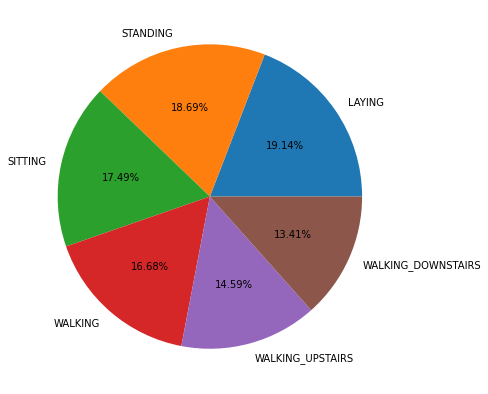

In [9]:
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
labels = df['labels']
sizes = df['values']
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

### Split the dataset into the training set and test subsets.

In [10]:
X_train = pd.DataFrame(train.drop(['Activity','subject'], axis=1))
#target
y_train = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'], axis=1))
y_test = test.Activity.values.astype(object)

print(X_train.shape, X_test.shape)

(7352, 561) (2947, 561)


In [11]:
print(y_train[:20])

['WALKING' 'STANDING' 'STANDING' 'LAYING' 'STANDING' 'WALKING_DOWNSTAIRS'
 'STANDING' 'LAYING' 'SITTING' 'STANDING' 'WALKING_UPSTAIRS' 'SITTING'
 'WALKING_UPSTAIRS' 'SITTING' 'STANDING' 'STANDING' 'WALKING' 'WALKING'
 'STANDING' 'SITTING']


### Transforming non numerical labels into numeric labels using LabelEncoder

In [12]:
from sklearn import preprocessing

# Encode target labels with value between 0 and n_classes-1.
encoder = preprocessing.LabelEncoder()

# Fit label encoder and return encoded labels.
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# Fit label encoder and return encoded labels.
encoder.fit(y_test)
y_test = encoder.transform(y_test)

In [13]:
print(y_train[:20])

[3 2 2 0 2 4 2 0 1 2 5 1 5 1 2 2 3 3 2 1]


In [14]:
# Dimension of Train and Test set and label
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")
print("Dimension of Train labels",y_train.shape)
print("Dimension of Test labels",y_test.shape,"\n")

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Dimension of Train labels (7352,)
Dimension of Test labels (2947,) 



In [15]:
#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
names_of_predictors = list(X_train.columns.values)
print("Number of features:", num_cols.size)

Number of features: 561


In [16]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implementation Using SVM

### Hyperparameter tuning using grid search and cross validation

In [17]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

### Training SVM model using radial kernel

In [18]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), parameters, cv=5)
svm_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

### Confusion Matrix and Accuracy Score

In [19]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9873509158932098 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



### Confusion Matrix

In [20]:
print(confusion_matrix(y_test, Y_pred))

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]


### Classificatin report

In [21]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.97      0.94       532
           3       0.96      0.99      0.98       496
           4       0.99      0.95      0.97       420
           5       0.96      0.96      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [22]:
print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test))

Training set score for SVM: 0.996872
Testing  set score for SVM: 0.961656


## Implementation Using Random_Forest_Classifier

### Libraries to Build Ensemble Model : Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create the parameter grid based on the results of random search 
param_random = {
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100, 200, 300,500]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_random = GridSearchCV(estimator = rf, param_random = param_random,cv = 3, n_jobs = -1, verbose = 2)


### Fit the grid search to the data

In [24]:
grid_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

### Predicting the Test set results

In [57]:
best_model = grid_search.best_estimator_
Y_pred_random = best_model.predict(X_test_scaled)
Y_random = list(encoder.inverse_transform(Y_pred_random))

print(confusion_matrix(y_test,Y_pred_random))

[[537   0   0   0   0   0]
 [  0 440  51   0   0   0]
 [  0  49 483   0   0   0]
 [  0   0   0 482   7   7]
 [  0   0   0  19 355  46]
 [  0   0   0  31   8 432]]


In [58]:
print(classification_report(y_test,Y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.90      0.90      0.90       491
           2       0.90      0.91      0.91       532
           3       0.91      0.97      0.94       496
           4       0.96      0.85      0.90       420
           5       0.89      0.92      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [59]:
print("Training set score for Random_Forest_Classifier: %f" % best_model.score(X_train_scaled , y_train))
print("Testing  set score for Random_Forest_Classifier: %f" % best_model.score(X_test_scaled  , y_test ))

Training set score for Random_Forest_Classifier: 1.000000
Testing  set score for Random_Forest_Classifier: 0.926026


## Implementation Using KNeighborsClassifier

### Importing Libraries

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors = 6) 

In [69]:
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [70]:
print(confusion_matrix(y_test, y_pred_knn))

[[518  13   6   0   0   0]
 [  3 406  81   0   0   1]
 [  0  56 476   0   0   0]
 [  0   0   0 487   7   2]
 [  0   0   0  64 311  45]
 [  0   0   0  54   6 411]]


In [71]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       537
           1       0.85      0.83      0.84       491
           2       0.85      0.89      0.87       532
           3       0.80      0.98      0.88       496
           4       0.96      0.74      0.84       420
           5       0.90      0.87      0.88       471

    accuracy                           0.89      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.89      0.88      2947



In [72]:
print("Training set score for KNN: %f" % knn.score(X_train_scaled , y_train))
print("Testing  set score for KNN: %f" % knn.score(X_test_scaled  , y_test))

Training set score for KNN: 0.983270
Testing  set score for KNN: 0.885307


## Best Model obtained is using SVM Model with an accuracy of 96% 